# Gaussian Process Regressor Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from gaussian_process import GaussianProcessRegressor

In [2]:
# Generate sample data
def f(x):
    return np.sin(x) + 0.1 * np.cos(10*x)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = f(X) + 0.1 * np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/ec2-user/SageMaker/NEWGIT/4. Machine Learning and AI/Classical ML Algorithms Implementation/gaussian_process.py:25: RuntimeWarning: divide by zero encountered in log
  0.5 * np.log(np.linalg.det(K)) + 0.5 * len(self.X_train) * np.log(2*np.pi)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/numpy/linalg/_linalg.py:2432: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/home/ec2-user/SageMaker/NEWGIT/4. Machine Learning and AI/Classical ML Algorithms Implementation/gaussian_process.py:45: RuntimeWarning: invalid value encountered in sqrt
  sigma_s = np.sqrt(np.diag(K_ss - K_s.T.dot(K_inv).dot(K_s)))


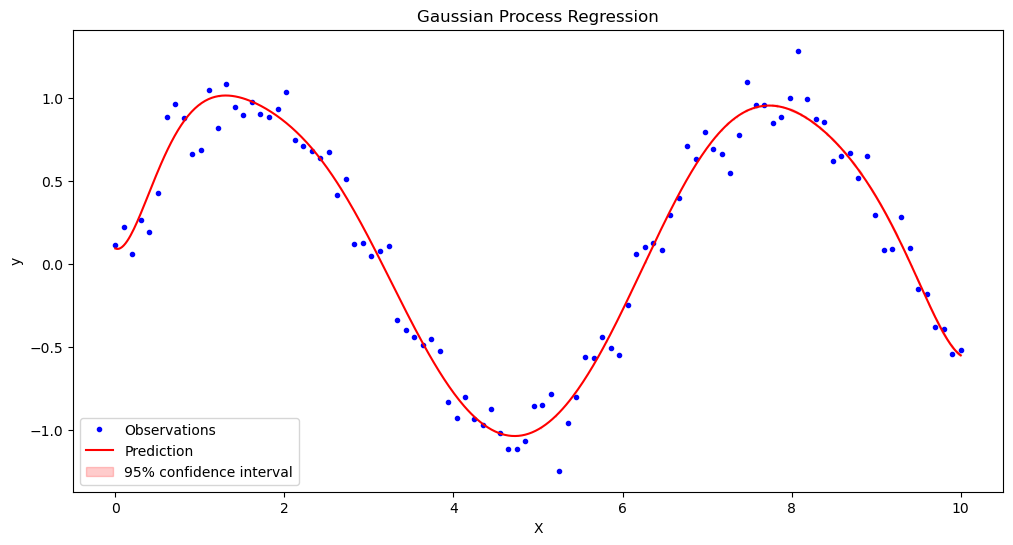

In [3]:
# Train Gaussian Process model
gp = GaussianProcessRegressor()
gp.fit(X_train_scaled, y_train)

# Make predictions
X_plot = np.linspace(0, 10, 500).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)
y_pred, sigma = gp.predict(X_plot_scaled, return_std=True)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b.', label='Observations')
plt.plot(X_plot, y_pred, 'r-', label='Prediction')
plt.fill_between(X_plot.ravel(), 
                 y_pred.ravel() - 1.96 * sigma, 
                 y_pred.ravel() + 1.96 * sigma, 
                 alpha=0.2, color='r', label='95% confidence interval')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.show()

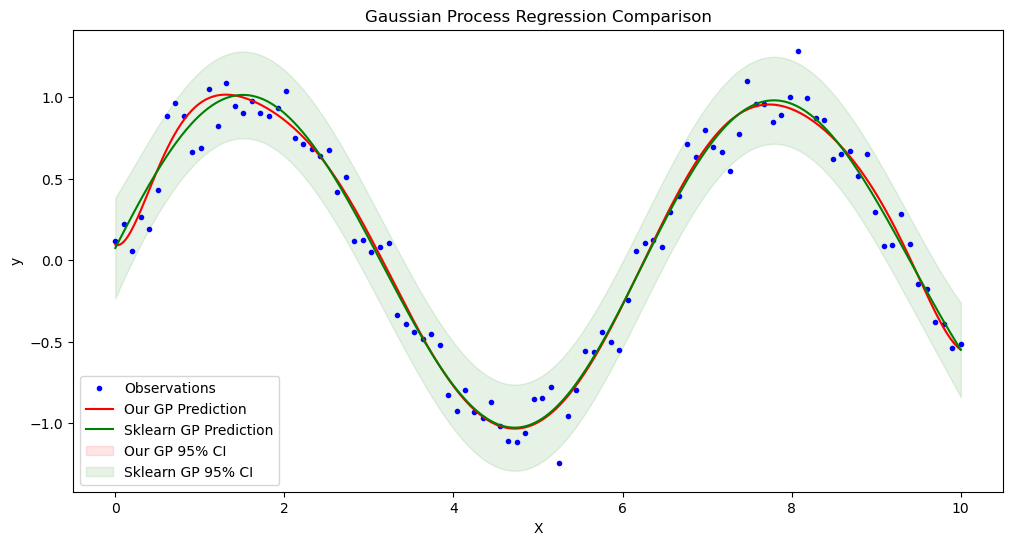

In [4]:
# Compare with sklearn's GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor as SKGaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

sk_kernel = RBF() + WhiteKernel()
sk_gp = SKGaussianProcessRegressor(kernel=sk_kernel, n_restarts_optimizer=10)
sk_gp.fit(X_train_scaled, y_train)

sk_y_pred, sk_sigma = sk_gp.predict(X_plot_scaled, return_std=True)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'b.', label='Observations')
plt.plot(X_plot, y_pred, 'r-', label='Our GP Prediction')
plt.plot(X_plot, sk_y_pred, 'g-', label='Sklearn GP Prediction')
plt.fill_between(X_plot.ravel(), 
                 y_pred.ravel() - 1.96 * sigma, 
                 y_pred.ravel() + 1.96 * sigma, 
                 alpha=0.1, color='r', label='Our GP 95% CI')
plt.fill_between(X_plot.ravel(), 
                 sk_y_pred - 1.96 * sk_sigma, 
                 sk_y_pred + 1.96 * sk_sigma, 
                 alpha=0.1, color='g', label='Sklearn GP 95% CI')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression Comparison')
plt.show()